# Text Classification
Dataset: AG News Classification Dataset
https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/hytung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hytung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hytung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/hytung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Class Index
# Consists of class ids 1-4 where 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [3]:
# load the data
train_df = pd.read_csv('train.csv')
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
print(train_df.shape)
print(train_df.info())

(120000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
None


In [5]:
#NLP
# Change all the text to lower case. 
train_df['Description'] = [d.lower() for d in train_df['Description']]

# Tokenization and Remove Stop words, Word Lemmatization
#nltk
customStopWords=stopwords.words('english')+list(punctuation)

lemmatizer = WordNetLemmatizer()
for index, entry in enumerate(train_df['Description']):
    tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(entry) if token not in customStopWords]
    train_df.loc[index, 'clean_description'] = " ".join(tokens)

# remove short words (length < 2)
train_df['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

train_df.head()

,Class Index,Title,Description,clean_description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"reuters - short-sellers, wall street's dwindli...",reuters short-sellers wall street 's dwindling...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,reuters - private investment firm carlyle grou...,reuters private investment firm carlyle group ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters - soaring crude prices plus worries\ab...,reuters soaring crude price plus worries\about...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,reuters - authorities have halted oil export\f...,reuters authority halted oil export\flows main...
4,3,"Oil prices soar to all-time record, posing new...","afp - tearaway world oil prices, toppling reco...",afp tearaway world oil price toppling record s...


In [6]:
from wordcloud import WordCloud

In [7]:
world = train_df[train_df["Class Index"] == 1]["clean_description"]
sports = train_df[train_df["Class Index"] == 2]["clean_description"]
business = train_df[train_df["Class Index"] == 3]["clean_description"]
scitech = train_df[train_df["Class Index"] == 4]["clean_description"]


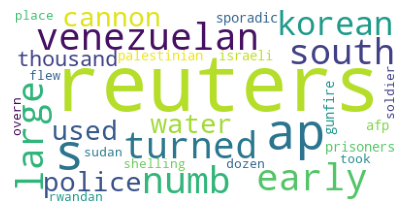

In [8]:
wordcloud1 = WordCloud(max_font_size=80,max_words=30, background_color="white").generate(str(world))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

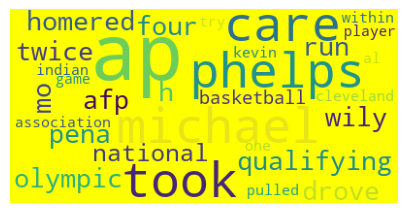

In [9]:
wordcloud2 = WordCloud(max_font_size=80,max_words=30, background_color="yellow").generate(str(sports))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

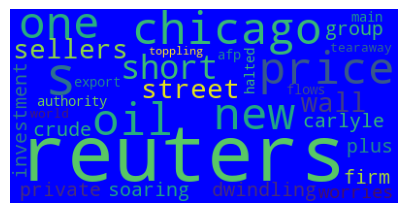

In [10]:
wordcloud3 = WordCloud(max_font_size=80,max_words=30, background_color="blue").generate(str(business))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

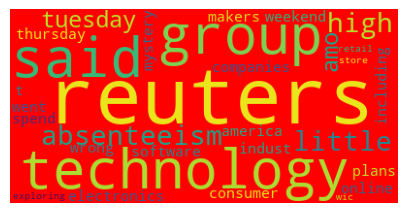

In [11]:
wordcloud4= WordCloud(max_font_size=80,max_words=30, background_color="red").generate(str(scitech))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [12]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [13]:
#NLP
# Change all the text to lower case. 
test_df['Description'] = [d.lower() for d in test_df['Description']]

# Tokenization and Remove Stop words, Word Lemmatization
#nltk
for index, entry in enumerate(test_df['Description']):
    tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(entry) if token not in customStopWords]
    test_df.loc[index, 'clean_description'] = " ".join(tokens)

# remove short words (length < 2)
test_df['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

test_df.head()

,Class Index,Title,Description,clean_description
0,3,Fears for T N pension after talks,unions representing workers at turner newall...,union representing worker turner newall say 'd...
1,4,The Race is On: Second Private Team Sets Launc...,"space.com - toronto, canada -- a second\team o...",space.com toronto canada -- second\team rocket...
2,4,Ky. Company Wins Grant to Study Peptides (AP),ap - a company founded by a chemistry research...,ap company founded chemistry researcher univer...
3,4,Prediction Unit Helps Forecast Wildfires (AP),ap - it's barely dawn when mike fitzpatrick st...,ap 's barely dawn mike fitzpatrick start shift...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),ap - southern california's smog-fighting agenc...,ap southern california 's smog-fighting agency...


In [14]:
train_y = train_df['Class Index']
train_X = train_df['clean_description']

test_y = test_df['Class Index']
test_X = test_df['clean_description']

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120000,)
(7600,)
(120000,)
(7600,)


In [15]:
# Calculate TF-TDF
####  Term Frequency: This summarizes how often a given word appears within a document
#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [16]:
Tfidf_vect = TfidfVectorizer(stop_words=customStopWords, max_df=0.8)

Tfidf_vect.fit(train_X)

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [17]:
print(train_X_Tfidf.shape)

(120000, 55721)


In [18]:
print(train_X_Tfidf[0])

  (0, 53598)	0.21371566146499915
  (0, 51491)	0.3272587898723795
  (0, 47714)	0.20322036743434466
  (0, 45124)	0.23385248555324895
  (0, 44388)	0.4226199878082153
  (0, 44304)	0.30146436911014846
  (0, 42005)	0.12297826176278435
  (0, 21945)	0.23979206804497497
  (0, 16268)	0.3628202983820356
  (0, 13399)	0.4420939796906683
  (0, 6049)	0.28643294722852863


In [19]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
dense_mat = train_X_Tfidf.todense()
tfidf_Mat = pd.DataFrame(dense_mat, columns=Tfidf_vect.get_feature_names_out())
tfidf_Mat.head()

,00,000,000016447,00010563n,0002,0004287,0005173miami050,000660,0009875buffalo040,000bn,...,zwick,zwiki,zy,zydrunas,zygmunt,zyman,zyprexa,zz,zzz,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print([col for col in tfidf_Mat.columns])

['00', '000', '000016447', '00010563n', '0002', '0004287', '0005173miami050', '000660', '0009875buffalo040', '000bn', '000km', '000m', '000metres', '000mph', '000rpm', '000th', '001', '001107539', '001273145', '0013', '002', '002d', '004', '0040', '005', '005380', '005930', '007', '008', '00am', '00pm', '01', '010', '0100', '0115', '0121', '0125', '013', '0133', '0141', '01473', '0151', '016', '02', '020', '024', '025', '025bil', '026', '027', '028', '0291', '03', '030', '0300', '033', '034220', '035', '0355', '037', '038', '04', '040', '0409231157', '0416', '042', '045', '046', '048', '04m', '04q4', '04sg1', '05', '050', '050km', '051', '052', '0530', '054', '055', '056', '058', '059', '06', '060', '0600', '062', '0630', '064', '0645', '065', '066', '0669', '068', '069', '06bn', '06pm', '07', '070', '072', '075', '0753', '076', '0763', '078', '07bn', '08', '080', '0800', '0804', '081', '082', '086', '087', '08bn', '08s', '09', '0906', '094', '096', '0992', '0ghz', '0i', '0k', '0pr', '

In [21]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf, train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

# Use classification_report function to get the accuracy
report = classification_report(test_y, pred_test)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.94      0.97      0.96      1900
           3       0.86      0.85      0.85      1900
           4       0.86      0.87      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



In [22]:
# fit the training dataset on the NB classifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(train_X_Tfidf, train_y)

# get predictions with the fitted model
dtree_preds = dtree.predict(test_X_Tfidf)
report = classification_report(test_y, dtree_preds)
print(report)

              precision    recall  f1-score   support

           1       0.89      0.30      0.44      1900
           2       0.89      0.32      0.47      1900
           3       0.71      0.35      0.47      1900
           4       0.30      0.85      0.45      1900

    accuracy                           0.45      7600
   macro avg       0.70      0.45      0.46      7600
weighted avg       0.70      0.45      0.46      7600



In [23]:
'''
__Observation__: 

    Recall is the performance metric in this case. 
    Based on the Recall score, naive_bayes performed better than others.
'''

'\n__Observation__: \n\n    Recall is the performance metric in this case. \n    Based on the Recall score, naive_bayes performed better than others.\n'